Hometask for lesson 5

In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from matplotlib.colors import ListedColormap



In [6]:
# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [7]:
# Train KNN classifiers for different K
best_k = None
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = accuracy_score(y_test, knn.predict(X_test))
    if score > best_score:
        best_k, best_score = k, score

print(f'The best K for classification: {best_k}, Accuracy: {best_score:.4f}')

The best K for classification: 1, Accuracy: 1.0000


In [8]:
# Generate synthetic dataset
X_synth, y_synth = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_synth = y_synth % 2
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_synth, y_synth, test_size=0.3, random_state=42)

# Train KNN regressors for different K
best_k_reg = None
best_mse = float('inf')
for k in range(1, 21):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_s, y_train_s)
    mse = mean_squared_error(y_test_s, knn_reg.predict(X_test_s))
    if mse < best_mse:
        best_k_reg, best_mse = k, mse

print(f'The best K for regression: {best_k_reg}, MSE: {best_mse:.4f}')



The best K for regression: 11, MSE: 0.0640


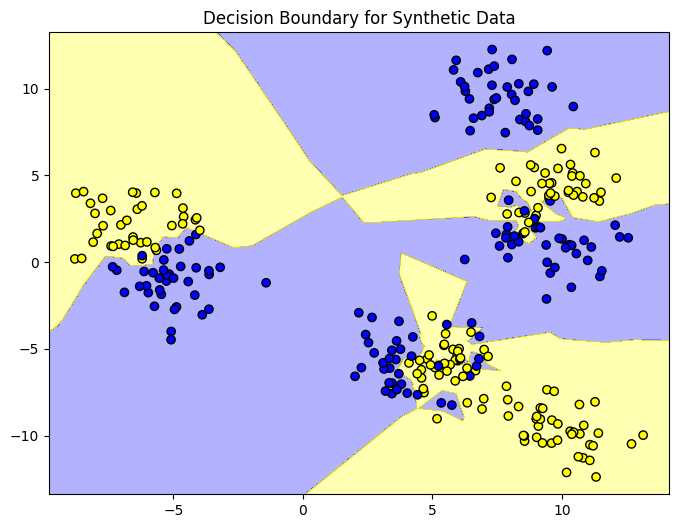

In [9]:
# Visualize decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_bold = ListedColormap(['blue', 'yellow'])
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_bold)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_bold)
    plt.title(title)
    plt.show()

best_knn_clf = KNeighborsClassifier(n_neighbors=best_k)
best_knn_clf.fit(X_train_s, y_train_s)
plot_decision_boundary(X_synth, y_synth, best_knn_clf, 'Decision Boundary for Synthetic Data')